In [13]:
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
import numpy as np
import matplotlib.pyplot as plt

In [14]:
train_path="Project Clothes/test"
test_path="Project Clothes/train"

In [15]:
vgg=VGG16(input_shape=[224,224,3],weights="imagenet",include_top=False)

In [16]:
#don't train extsting layers
for layers in vgg.layers:
  layers.trainable=False

In [17]:
x=Flatten()(vgg.output)

In [18]:
prediction = Dense(3,activation="softmax")(x)

In [19]:
model=Model(inputs=vgg.input,outputs=prediction)

In [20]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │        75,267 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,789,955 (56.42 MB)

 Trainable params: 75,267 (294.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [21]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1/255)
training_set=train_datagen.flow_from_directory(train_path,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')  
testing_set=test_datagen.flow_from_directory(test_path,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')

Found 920 images belonging to 3 classes.
Found 2171 images belonging to 3 classes.


In [23]:
testing_set.classes

array([0, 0, 0, ..., 2, 2, 2])

In [24]:
r=model.fit(training_set,validation_data=testing_set,epochs=5)

Epoch 1/5


c:\Users\God\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.4816 - loss: 1.5618 

c:\Users\God\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


29/29 ━━━━━━━━━━━━━━━━━━━━ 977s 34s/step - accuracy: 0.4860 - loss: 1.5467 - val_accuracy: 0.6025 - val_loss: 1.0867
Epoch 2/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 1257s 44s/step - accuracy: 0.8417 - loss: 0.4154 - val_accuracy: 0.6274 - val_loss: 1.0433
Epoch 3/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 1067s 37s/step - accuracy: 0.9298 - loss: 0.2204 - val_accuracy: 0.6624 - val_loss: 1.0243
Epoch 4/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 1161s 40s/step - accuracy: 0.9545 - loss: 0.1640 - val_accuracy: 0.6568 - val_loss: 1.0460
Epoch 5/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 1282s 45s/step - accuracy: 0.9566 - loss: 0.1272 - val_accuracy: 0.6596 - val_loss: 1.1138


In [41]:
model.save("fashion_model_1.h5")

In [26]:
r.history

{'accuracy': [0.613043487071991,
  0.8500000238418579,
  0.9326087236404419,
  0.947826087474823,
  0.959782600402832],
 'loss': [1.1094516515731812,
  0.408157080411911,
  0.21712705492973328,
  0.1657951921224594,
  0.1280476599931717],
 'val_accuracy': [0.602487325668335,
  0.6273606419563293,
  0.662367582321167,
  0.6568401455879211,
  0.6596038937568665],
 'val_loss': [1.0866875648498535,
  1.043275237083435,
  1.0243386030197144,
  1.0460295677185059,
  1.113821029663086]}

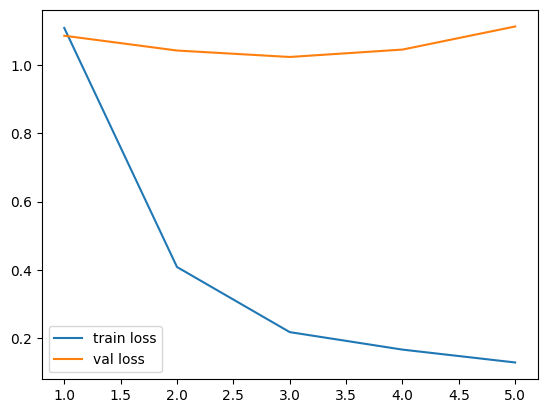

In [27]:
plt.plot(range(1,6),r.history['loss'],label='train loss')
plt.plot(range(1,6),r.history['val_loss'],label='val loss')
plt.legend()
plt.show()

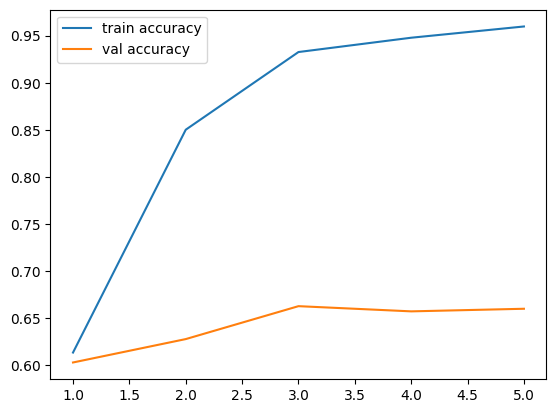

In [28]:
plt.plot(range(1,6),r.history['accuracy'],label='train accuracy')
plt.plot(range(1,6),r.history['val_accuracy'],label='val accuracy')
plt.legend()
plt.show()